In [25]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [26]:
'''img=cv2.imread(r"D:\Machine Learning\image_classification\model\test_images\Cristiano-Ronaldo-ceremony-rename-airport-Santa-Cruz-Madeira-Portugal-March-29-2017.jpg")
img.shape'''

'img=cv2.imread(r"D:\\Machine Learning\\image_classification\\model\test_images\\Cristiano-Ronaldo-ceremony-rename-airport-Santa-Cruz-Madeira-Portugal-March-29-2017.jpg")\nimg.shape'

In [27]:
#plt.imshow(img)

In [28]:
'''gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape'''##

'gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)\ngray.shape'

In [29]:
#gray

In [30]:
#plt.imshow(gray,cmap='gray')

In [31]:
face_cascade=cv2.CascadeClassifier(r"D:\Machine Learning\image_classification\model\open_cv\haarcascade_frontalface_alt.xml")
eye_cascade=cv2.CascadeClassifier(r"D:\Machine Learning\image_classification\model\open_cv\haarcascade_eye.xml")

#faces=face_cascade.detectMultiScale(gray,1.3,5)
#faces

In [32]:
'''(x,y,w,h)=faces[0]
x,y,w,h'''

'(x,y,w,h)=faces[0]\nx,y,w,h'

In [33]:
'''face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)'''

'face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)\nplt.imshow(face_img)'

In [34]:
cv2.destroyAllWindows()
'''for(x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()'''

"for(x,y,w,h) in faces:\n    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)\n    roi_gray=gray[y:y+h,x:x+w]\n    roi_color=face_img[y:y+h,x:x+w]\n    eyes=eye_cascade.detectMultiScale(roi_gray)\n    for (ex,ey,ew,eh) in eyes:\n        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)\n\nplt.figure()\nplt.imshow(face_img,cmap='gray')\nplt.show()"

In [35]:
#plt.imshow(roi_color,cmap='gray')

In [36]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if(len(eyes)>=2):
            return roi_color
    

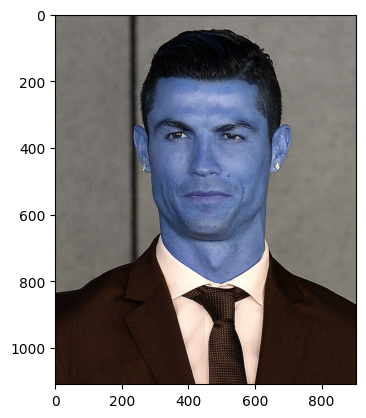

In [37]:
original_image=cv2.imread(r"D:\Machine Learning\image_classification\model\test_images\Cristiano-Ronaldo-ceremony-rename-airport-Santa-Cruz-Madeira-Portugal-March-29-2017.jpg")
plt.imshow(original_image)

[[[113 112 108]
  [114 112 111]
  [113 111 110]
  ...
  [142 138 133]
  [140 136 131]
  [137 133 128]]

 [[119 117 116]
  [113 111 110]
  [109 107 106]
  ...
  [145 141 136]
  [138 134 129]
  [132 128 123]]

 [[112 110 109]
  [108 106 106]
  [106 104 104]
  ...
  [133 129 124]
  [132 128 123]
  [141 137 132]]

 ...

 [[117 114 109]
  [120 117 112]
  [115 112 107]
  ...
  [123 121 111]
  [126 124 114]
  [125 123 113]]

 [[117 114 109]
  [121 118 113]
  [116 113 108]
  ...
  [123 121 111]
  [123 121 111]
  [123 121 111]]

 [[120 117 112]
  [118 114 109]
  [115 111 106]
  ...
  [126 121 112]
  [126 121 112]
  [129 124 115]]]


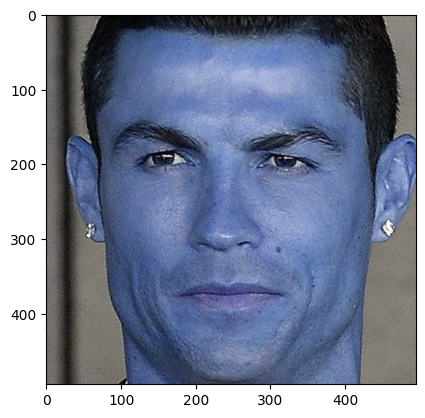

In [38]:
cropped_image=get_cropped_image_if_2_eyes(r"D:\Machine Learning\image_classification\model\test_images\Cristiano-Ronaldo-ceremony-rename-airport-Santa-Cruz-Madeira-Portugal-March-29-2017.jpg")
print(cropped_image)
plt.imshow(cropped_image)

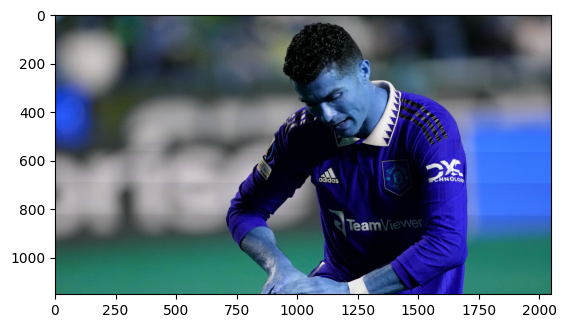

In [39]:
org_img_obstruct=cv2.imread(r"D:\Machine Learning\image_classification\model\test_images\skynews-cristiano-ronaldo-ronaldo_5938382.jpg")
plt.imshow(org_img_obstruct)

In [40]:
cropped_image_obstruct=get_cropped_image_if_2_eyes(r"D:\Machine Learning\image_classification\model\test_images\skynews-cristiano-ronaldo-ronaldo_5938382.jpg")
cropped_image_obstruct #returns nothing mean no.of eyes are less than 2

In [41]:
path_to_data='./dataset/'
path_to_cr_data='./dataset/cropped/'
               

In [42]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [43]:
for entry in os.scandir(path_to_data):
    print(entry.name)

cristiano_ronaldo
mike_tyson
virat_kohli


In [44]:
img_dirs

['./dataset/cristiano_ronaldo',
 './dataset/mike_tyson',
 './dataset/virat_kohli']

In [45]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


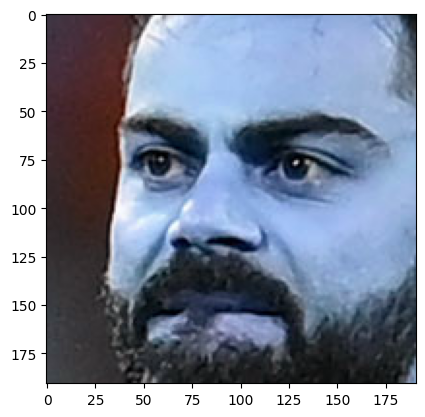

In [46]:
roi_color=get_cropped_image_if_2_eyes(r"D:\Machine Learning\image_classification\model\dataset\virat_kohli\17kohli1.jpg")
plt.imshow(roi_color)

In [47]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name]=[]
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        #print(roi_color)
        if (roi_color is not None):
            cropped_folder=path_to_cr_data + celebrity_name

            #plt.imshow(roi_color)
            #print(cropped_folder)

            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('generating cropped images in folder')
            cropped_file_name = celebrity_name + str(count) +'.png'
            cropped_file_path = cropped_folder+'/' +cropped_file_name

            #print(roi_color)
            #print(roi_color)

            #plt.imshow(roi_color,cmap='gray')

            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
            

cristiano_ronaldo
generating cropped images in folder
mike_tyson
generating cropped images in folder
virat_kohli
generating cropped images in folder


In [48]:
import numpy as np
import pywt
import cv2

def w2d(img,mode='haar',level=1):
    imArray=img
    #convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255
    #compute coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)

    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H*=255
    imArray_H=np.uint8(imArray_H)

    return imArray_H



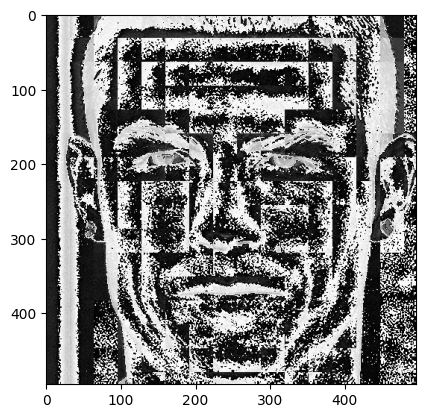

In [49]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [50]:
celebrity_file_names_dict

{'cristiano_ronaldo': ['./dataset/cropped/cristiano_ronaldo/cristiano_ronaldo1.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo2.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo3.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo4.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo5.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo6.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo7.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo8.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo9.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo10.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo11.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo12.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo13.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo14.png',
  './dataset/cropped/cristiano_ronaldo/cristiano_ronaldo15.png',
  './dataset/

In [51]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict

{'cristiano_ronaldo': 0, 'mike_tyson': 1, 'virat_kohli': 2}

In [52]:
x,y=[],[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for trainimg_image in training_files:
        img=cv2.imread(trainimg_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [53]:
len(x[0]),len(x),type(x),x[0]

(4096,
 148,
 list,
 array([[ 49],
        [ 47],
        [ 47],
        ...,
        [244],
        [ 22],
        [  8]], dtype=uint8))

In [54]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(148, 4096)

In [55]:
x[0]

array([ 49.,  47.,  47., ..., 244.,  22.,   8.])

data cleaning and feature engineering is done
now we will make a model,using svm

In [56]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8378378378378378

In [58]:
len(x_test)

37

In [59]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        29
           1       1.00      0.33      0.50         3
           2       1.00      0.20      0.33         5

    accuracy                           0.84        37
   macro avg       0.94      0.51      0.58        37
weighted avg       0.87      0.84      0.80        37



In [60]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [61]:
model_params={
    'svm':{
         'model':svm.SVC(gamma='auto',probability=True),
         'params':{
             'svc__C':[1,10,100,1000],
             'svc__kernel':['rbf','linear']
         }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
               'randomforestclassifier__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
         'params':{
                'logisticregression__C':[1,5,10]
         }
    }
}

In [62]:
scores=[]
best_estimators = {}
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(),mp['model'])
    clf=GridSearchCV(pipe,mp['params'],cv=5,return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_estimator_
    })
    best_estimators[algo]=clf.best_estimator_

df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.918972,"(StandardScaler(), SVC(C=1, gamma='auto', kern..."
1,random_forest,0.828854,"(StandardScaler(), (DecisionTreeClassifier(max..."
2,logistic_regression,0.919368,"(StandardScaler(), LogisticRegression(C=1, sol..."


In [63]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [64]:
#difference between train,test,validation data

In [65]:
best_estimators['svm'].score(x_test,y_test)

0.9459459459459459

In [66]:
best_estimators['random_forest'].score(x_test,y_test)

0.8648648648648649

In [67]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.918918918918919

In [68]:
#we will use svm
best_clf = best_estimators['svm']

In [69]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[27,  2,  0],
       [ 0,  3,  0],
       [ 0,  0,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'true')

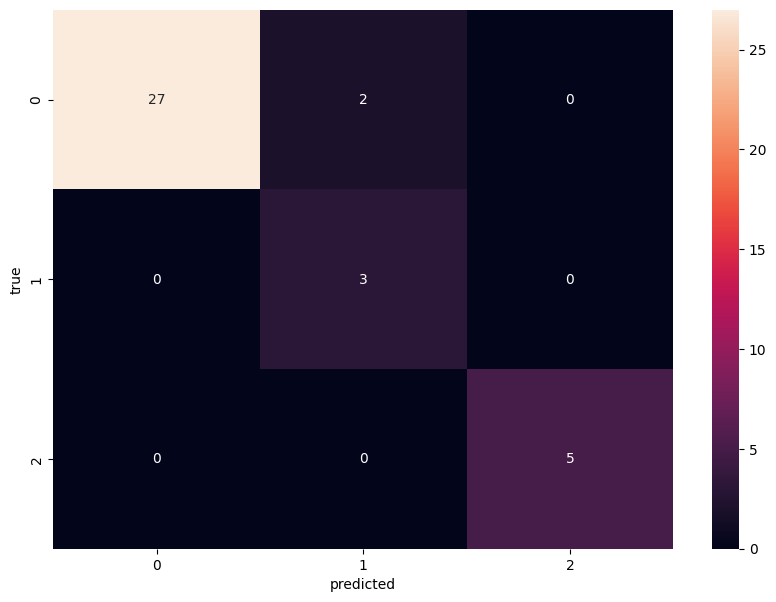

In [70]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('true')

In [71]:
class_dict

{'cristiano_ronaldo': 0, 'mike_tyson': 1, 'virat_kohli': 2}

In [72]:
import joblib

In [73]:
joblib.dump(best_clf,'saved_model_pkl')

['saved_model_pkl']

In [74]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))